# Submission - Exercises sheet 2
MA-INF 4236 - Advanced Methods for Text Mining, So24<br>
Yara Elwakeel 50135730<br>
Aksa Aksa 50146305<br>
Sadia Naseer 50194450<br>
Ali Ather 50194294<br>
Affan Zafar 50167759<br>
june 19, 2024<br>

## 1)Orthonormal Vectors

1. **Calculate c = ∥𝑎∥+∥𝑏∥**

Given that a and b are orthonormal vectors:

The magnitude of each vector is 1, since they are unit vectors.
Thus, ∥a∥=1 and ∥b∥=1

Therefore, c=∥a∥+∥b∥=1+1=2.

2. **Calculate d (cosine similarity between a and b)**

Cosine similarity between two vectors a and b is defined as:
cosine similarity(a,b)= a⋅b / ∥a∥∥b∥

Since a and b are orthonormal vectors:
∥a∥=1 and ∥b∥=1,
a⋅b=0 (because they are orthogonal).
Thus,
d = a⋅b/∥a∥∥b∥  = 0/ 1⋅1 = 0.

## 2)Latent Semantic Indexing

### 2.1) Theory 

To analyze a matrix X∈R mxn, which represents the bag-of-words (BoW) for m documents and n unique words, we can utilize matrix factorization, specifically Singular Value Decomposition (SVD).

**SVD**

This process involves decomposing a matrix into the product of two or more matrices. For SVD, it decomposes a matrix into three matrices:

X=UΣVT


where:

U∈R mxm is an orthogonal matrix with columns known as the left singular vectors.

Σ∈R m×n is a diagonal matrix containing the singular values.

V∈R n×n is an orthogonal matrix with columns known as the right singular vectors

**Step 1: Perform SVD**

The first step is to compute the SVD of matrix X:

X=UΣVT

U: Captures the document space.

Σ: Contains singular values indicating the importance of each dimension.

V: Captures the word space.

**Step 2: Dimensionality Reduction**

To focus on the most significant patterns and reduce noise, we truncate the SVD matrices. This involves selecting the top k singular values and their corresponding vectors, leading to:

Xk = U Σ V.T

where

U: Contains the first k columns of U.

Σ: Is a kxk diagonal matrix with the top k singular values.

V: Contains the first k columns of V.
The reduced matrix X k captures the most essential information while discarding less significant data, effectively reducing the dimensionality and noise.

### 2.2) Implementation 

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

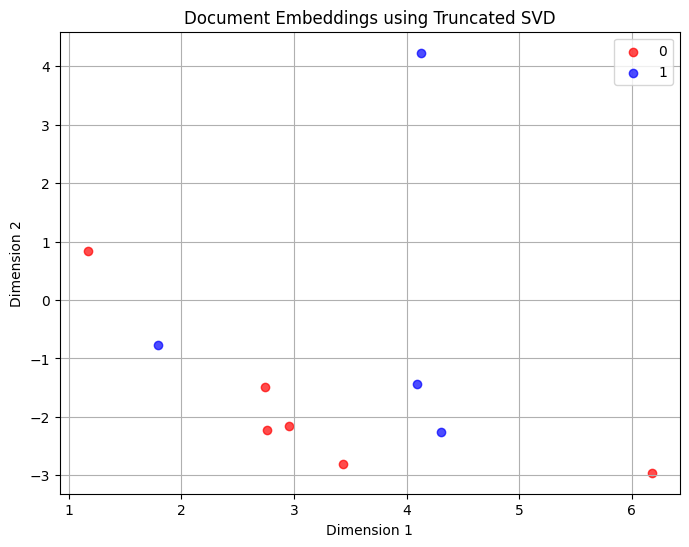

In [ ]:
!pip install datasets

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset

# Load IMDb dataset from Hugging Face
dataset = load_dataset('imdb')
train_data = dataset['train']
test_data = dataset['test']

# Preprocess text function
import re
def preprocess_text(text):
    # Remove HTML tags using regex
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to train and test sets
train_data = train_data.map(lambda example: {'text': preprocess_text(example['text'])})
test_data = test_data.map(lambda example: {'text': preprocess_text(example['text'])})

# Convert train and test datasets to Pandas DataFrame for easier handling
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Create bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

# Apply Truncated SVD (LSA) with k=2
svd = TruncatedSVD(n_components=2)
X_train_reduced = svd.fit_transform(X_train)

# Prepare a subset of the test set for plotting
np.random.seed(42)  # For reproducibility
test_subset_indices = np.random.choice(len(test_df), size=10, replace=False)
test_subset_texts = test_df.loc[test_subset_indices, 'text'].tolist()

# Vectorize the selected test subset
X_test_subset = vectorizer.transform(test_subset_texts)

# Generate embeddings for the test subset
X_test_subset_reduced = svd.transform(X_test_subset)

# Get corresponding sentiment labels for the test subset
test_subset_sentiments = test_df.loc[test_subset_indices, 'label']

# Encode sentiment labels
label_encoder = LabelEncoder()
y_subset = label_encoder.fit_transform(test_subset_sentiments)

# Plotting
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']  # Red for negative, Blue for positive
for label, color in zip(np.unique(y_subset), colors):
    plt.scatter(X_test_subset_reduced[y_subset == label, 0], X_test_subset_reduced[y_subset == label, 1], c=color, label=label_encoder.inverse_transform([label])[0], alpha=0.7)

plt.title('Document Embeddings using Truncated SVD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


The plot shows the 2D embeddings of 10 randomly selected reviews from the test set, transformed using truncated SVD based on the training set. Each point represents a review, with red indicating negative sentiment and blue indicating positive sentiment.

The color separation of the points suggests that the SVD transformation captures some underlying sentiment structure in the reviews. Clustering of same-color points indicates that the model has effectively preserved sentiment-related features in the reduced dimensions. Conversely, if points of different colors are mixed together, it suggests that sentiment information is not well captured in these two dimensions.

## 3) Backpropagation

We need to derive the following equations:

$$
\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_kδ^l_j
$$
$$
\frac{\partial C}{\partial b^l_{j}} = δ^l_j
$$

Let's get started by first clarifying the terminologies:

$a^{l}_k$ is the activation function of kth neuron in the lth layer.

$b^{l}_j$ is the bias of jth neuron in the lth layer.

$w^l_{jk}$ is the weight from the kth neuron in the (l-1)th layer to the jth neuron in the lth layer

$C$ is the cost function over the $n$ training samples, i.e.,

$$
C = \frac{1}{n} \sum_{x} C_x
$$

where the cost of a single training example is:

$$
C_x = \frac{1}{2} \|y - a^L\|^2
$$

<br>

---

<br>
<br>

The error $\delta_j^l$ of neuron $j$ in layer $l$ is given by:

$$
\delta_j^l = \frac{\partial C}{\partial z_j^l}
$$

$$
\delta_j^l = \frac{\partial C}{\partial a_j^l} \cdot \frac{\partial a_j^l}{\partial z_j^l}
$$

$$
\delta_j^l = \frac{\partial C}{\partial a_j^l} \cdot \sigma' (z_j^l) \tag {equation-1}
$$

Taking equation $\frac{\partial C}{\partial a_j^l}$ from equation 1


$$
\frac{\partial C}{\partial a_j^l} = \sum_k \frac{\partial C}{\partial a_k^{l+1}} \cdot \frac{\partial a_k^{l+1}}{\partial z_k^{l+1}} \cdot \frac{\partial z^{l+1}_k}{\partial a_j^l}
$$

$$
\frac{\partial C}{\partial a_j^l} = \sum_k \frac{\partial C}{\partial z_k^{l+1}} \cdot \frac{\partial z_k^{l+1}}{\partial a_j^l}
$$

$$
\frac{\partial C}{\partial a_j^l} = \sum_k δ^{l+1}_j \cdot \frac{\partial z_k^{l+1}}{\partial a_j^l} \tag {equation-2}
$$

Taking $\frac{\partial z_k^{l+1}}{\partial a_j^l}$ from equation 2

$$
z_k^{l + 1}  =  \sum_{i} w_{ki}^{l + 1} a_i^{l-1} + b_k^{l + 1}
$$


$$
\frac{\partial z_k^{l+1}}{\partial a_j^l} = \frac{\partial}{\partial a_j^l} \left( \sum_{i} w_{ki}^{l+1} a_i^l + b_k^{l+1} \right)
$$

$$
\frac{\partial z_k^{l+1}}{\partial a_j^l} = w_{kj}^{l+1}
$$

Substituting back in equation 2, we get

$$
\frac{\partial C}{\partial a_j^l} = \sum_k \delta_k^{l+1} w_{kj}^{l+1}
$$

Substituting back in equation 1, we get

$$
\delta_j^l = \sum_k w_{kj}^{l+1} \delta_k^{l+1} \sigma'(z_j^l)
$$

<br>

---

<br>
<br>

Now that the error is derived, let's move on to $\frac{\partial C}{\partial w_{jk}^l}$


$$
\frac{\partial C}{\partial w_{jk}^{l}} = \frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{jk}^{l}}
$$

$$
\frac{\partial C}{\partial w_{jk}^{l}} = \delta_j^l \frac{\partial z_j^l}{\partial w_{jk}^{l}} \tag {equation-3}
$$

Taking $\frac{\partial z_j^l}{\partial w_{jk}^{l}}$ from equation 3

$$
z_j^l  =  \sum_{i} w_{ji}^{l} a_i^{l-1} + b_j^{l}
$$

$$
\frac{\partial z_j^l}{\partial w_{jk}^{l}}  = \frac{\partial}{\partial w_{jk}^{l}} \left( \sum_{i} w_{ji}^{l} a_i^{l-1} + b_j^{l} \right)
$$

$$
\frac{\partial z_j^l}{\partial w_{jk}^{l}}  = \frac{∂{w^l_{jk}a^{l-1}_k}}{\partial w_{jk}^{l}}
$$

$$
\frac{\partial z_j^l}{\partial w_{jk}^{l}}  = a^{l-1}_k
$$

Putting this back in equation 3, we get:

$$
\pmb {\frac{\partial C}{\partial w_{jk}^{l}} = \delta_j^l a^{l-1}_k}
$$

<br>

---

<br>
<br>

let's move on to $\frac{\partial C}{\partial b^l_{j}}$


$$
\frac{\partial C}{\partial b^l_{j}} = \frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial b^l_{j}}
$$

$$
\frac{\partial C}{\partial b^l_{j}}  = \delta_j^l \frac{\partial z_j^l}{\partial b^l_{j}} \tag {equation-4}
$$

Taking $\frac{\partial z_j^l}{\partial b^l_{j}}$ from equation 4

$$
z_j^l  =  \sum_{i} w_{ji}^{l} a_i^{l-1} + b_j^{l}
$$

$$
\frac{\partial z_j^l}{\partial b^l_{j}} = \frac{\partial}{\partial b^l_{j}} \left( \sum_{i} w_{ji}^{l} a_i^{l-1} + b_j^{l} \right)
$$

$$
\frac{\partial z_j^l}{\partial b^l_{j}}  = \frac{\partial b^l_{j}}{\partial b^l_{j}}
$$

$$
\frac{\partial z_j^l}{\partial b^l_{j}}  = 1
$$

Putting this back in equation 4, we get:

$$
\frac{\partial C}{\partial b^l_{j}}  = \delta_j^l.1
$$

$$
\pmb {\frac{\partial C}{\partial b^l_{j}}  = \delta_j^l}
$$


## 4)GloVe

### 4.1) Basic Idea
#### Introduction

The GloVe algorithm, introduced by Pennington et al. in 2014, is designed to learn vector representations of words using co-occurrence statistics from a text corpus.

### Key Concepts

**Co-occurrence Statistics:**

The algorithm uses these statistics to define a context for each word.
This context is crucial for training the word vectors.
Training Word Vectors:

The goal is to train word vectors such that the dot product of two vectors reflects the likelihood of the corresponding words appearing together in the same context.
This approach captures semantic and syntactic relationships between words.

**Weighting Function:**

A weighting function down-weights the influence of high-frequency words.
This prevents the vectors from being dominated by these common terms.
It also improves the quality of the word vectors by emphasizing more informative co-occurrence statistics.

### Advantages of GloVe


**1. Semantic and Syntactic Relationships:**

GloVe effectively captures both types of relationships due to its use of co-occurrence statistics.
Scalability

**2. Large Text Collections:**

GloVe can scale to very large text collections, making it suitable for extensive corpora.
Comparison with Other Methods
Differences from SVD-based Methods

**3. Context Definition:**

Unlike methods that use Singular Value Decomposition (SVD) to reduce the dimensionality of the document-term matrix, GloVe defines context based on co-occurrence statistics.
This leads to more effective capture of semantic and syntactic relationships.

### Conclusion

GloVe offers a powerful and flexible method for extracting latent semantic structures from a text corpus. Its use of co-occurrence statistics and a weighting function allows it to capture complex word relationships and scale to large datasets, providing high-quality word vectors for various natural language processing tasks.








### 4.2) Theory 

To model the relationship between two words $i$ and $j$ in the context of word $l$ in the GloVe model, we first need to compute the co-occurrence count of words $i$ and $j$ in the context of word $l$. This can be done by counting the number of times that words $i$ and $j$ appear together in the same context as word $l$ in the corpus of text. Once we have the co-occurrence count, we can apply the function $g(w_i, w_j , v_l)$ to model the relationship between the words. The function $g(w_i, w_j , v_l)$ is defined as follows:

$g(w_i, w_j , v_l) = P_{il} / P_{jl}$

As, we are concerned with the distance within a given word to contect. Therefore, the above equation is equivalent to:

$=g(w_i - w_j , v_l)$

$P_{il} / P_{jl}$ results a scalar value which suggest modeling our function $g$ as follows:

$g((w_i - w_j)^t.v_l) = P_{il} / P_{jl}$

The paper by Pennington explains the definition of $g$ to hold "homomorphism" which modifies our function $g((w_i - w_j)^t.v_l)$ to $g(w_i^t.v_l)/g(w_j^t.v_l)$.

Using:
$g(w_i^t.v_l)/g(w_j^t.v_l) = P_{il} / P_{jl}$   
And considering, both $P_{il}$ and $P_{jl}$ might be influenced with the same constant factor. It is safe to assume that:

$g(w_i^t.v_l) = P_{il}$

As the function $g$ is homomorphic, we can use $e$ to model. Inducing euler's function into above equation gives:

$g(w_i^t.v_l) = e^{w_i^t.v_l}$

Above two equation helps us in inducing following expression:

$e^{w_i^t.v_l} = P_{il}$, where $P_{il}$ is $c_{il}/c_i$ where $c_{il}$ is count of occurance of $i$ in the context of $l$ while $c_i$ is total occurrences of $i$th word.

$e^{w_i^t.v_l} = c_{il}/c_i$,
Taking log on both sides:
$w_i^t.v_l = log(c_{il})-log(c_i)$

$w_i^t.v_l + log(c_i) = log(c_{il})$

Introducing bias terms $b_i$ which absorbs $log(c_i)$ while adding $q_l$ as a bias term for $l$.

$w_i^t.v_l + b_i + q_l = log(c_{il})$

One of the perks of using GloVe Algorithm, is to normalize the weights of words depending their "commonness" which can explained as follow:

$\sum_{i,j}a(c_{ij})(w_i^t.v_l + b_i + q_l - log(c_{il}) )^2$

Here, $a(c_{ij})$ normalizes as per max occurrences within the corpus.




### 4.3) Applied Theory 

#### 1. Context Window in the GloVe Model

The context window in the GloVe model refers to the number of words surrounding a target word that are considered when constructing the word co-occurrence matrix. This window includes a set number of words to the left and right of the target word. The size of this context window determines the range of contextual words used to calculate co-occurrence probabilities, which are then utilized to generate the word embeddings. A larger window includes more words in the context, potentially capturing broader relationships, while a smaller window focuses on immediate neighbors, capturing more local dependencies.

#### 2. Impact of Context Window Size on Word Embeddings

**Short Context Windows (e.g., 2-5 words):**
- **Advantages:**
  - Captures local syntactic information, useful for tasks requiring detailed linguistic nuances.
  - Reduces noise by focusing on immediate, relevant neighbors.
- **Disadvantages:**
  - Limited in capturing broader semantic relationships and thematic context.
  - Poorer performance on tasks needing long-range dependencies.

**Long Context Windows (e.g., 10-20 words):**
- **Advantages:**
  - Encompasses broader semantic relationships, capturing richer thematic and global context.
  - Beneficial for understanding overall topics or themes in text.
- **Disadvantages:**
  - Increased noise due to inclusion of more distant, potentially unrelated words.
  - Higher computational cost for building and processing the larger co-occurrence matrix.

#### 3. Empirical Findings and Theoretical Insights

Studies indicate that the optimal context window size can vary depending on the task and dataset. For instance, smaller windows are more effective for syntactic tasks, while larger windows suit semantic tasks better. The variability and nature of the text corpus also influence the effectiveness of the window size, with homogeneous corpora potentially benefiting from smaller windows and diverse corpora from larger windows.

#### 4. Appropriate Context Window Sizes for Different Types of Text

**Technical Documents:**
- **Smaller Window (e.g., 2-5 words):** Suitable for capturing precise relationships and specific terminology due to the dense structure and specific language patterns of technical texts.

**Literature:**
- **Larger Window (e.g., 10-20 words):** Effective for capturing complex themes, narratives, and broader semantic relationships in literary texts, helping to understand nuanced meanings across longer text spans.

**Social Media:**
- **Variable Window:** Social media text is highly variable. Shorter windows may be better for syntactic nuances in short posts like tweets, while longer windows could capture the context in extended discussions. The choice should be based on the specific analysis needs, such as sentiment analysis or topic modeling.


### 4.4) Application 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Lambda
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
import re
import string

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### load data 

In [ ]:
#Reading input data
file = open('/content/SMSSpamCollection', 'r')
data = file.readlines()

data_dict = {'text': [], 'label': []}

#Convert target class to numeric values
for line in data:
  line_split = line.rstrip().split('\t')
  data_dict['text'].append(' '.join(line_split[1:]))
  data_dict['label'].append(0 if line_split[0] == 'ham' else 1)


data_df = pd.DataFrame.from_dict(data_dict)
data_df

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


### Preprocessing of data

In [ ]:
total_stopwords = set([word.replace("'",'') for word in stopwords.words('english')])
# Call the lemmatizer class
lemma = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    words = text.split() # Split the text into words by looking at the space between the texts
    # Stem the words and also remove stopwords
    words = [lemma.lemmatize(word) for word in words if (word not in total_stopwords) and (len(word)>1)] # Remove stop words
    # Put the clean words back together as a text message
    text = " ".join(words)
    return text


# data_collection.Text = data_collection.Text.apply(preprocess_text)
data_df.text=data_df.text.apply(preprocess_text)
data_df

,text,label
0,go jurong point crazy available bugis great wo...,0
1,ok lar joking wif oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,dun say early hor already say,0
4,nah think go usf life around though,0
...,...,...
5569,nd time tried contact pound prize claim easy c...,1
5570,going esplanade fr home,0
5571,pity mood suggestion,0
5572,guy bitching acted like id interested buying s...,0


### Tokenization and train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df.text, data_df.label, test_size=0.20)

max_features = 4000
max_len = 100

t = Tokenizer(num_words=max_features)

t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
tokenized_train = t.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=max_len)
tokenized_test = t.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=max_len)


### Glove embedding

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.100d.txt'
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding="utf8"))



In [ ]:
all_embeddings = np.stack(list(embeddings_index.values()))

In [ ]:
all_embeddings.shape

(400001, 100)

In [ ]:
embedding_mean, embedding_std = all_embeddings.mean(), all_embeddings.std()
embedding_size = all_embeddings.shape[1]

In [ ]:
word_index = t.word_index
max_features = min(max_features, len(word_index))

embedding_matrix = np.random.normal(embedding_mean, embedding_std, (max_features, max_len))
for word, i in word_index.items():
    if i >= max_features:
      continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

### Mean pooling

In [ ]:
batch_size = 64
embed_size = 100

In [ ]:
model = Sequential()

model.add(Embedding(max_features, output_dim=embedding_size, weights=[embedding_matrix], input_length = max_len, trainable=True))
model.add(Lambda(lambda x: tensorflow.reduce_mean(x, axis=1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test), epochs =10)

Epoch 1/10
70/70 [==============================] - 1s 11ms/step - loss: 0.4075 - accuracy: 0.8657 - val_loss: 0.3745 - val_accuracy: 0.8673
Epoch 2/10
70/70 [==============================] - 1s 9ms/step - loss: 0.3720 - accuracy: 0.8657 - val_loss: 0.3660 - val_accuracy: 0.8673
Epoch 3/10
70/70 [==============================] - 1s 9ms/step - loss: 0.3621 - accuracy: 0.8657 - val_loss: 0.3562 - val_accuracy: 0.8673
Epoch 4/10
70/70 [==============================] - 1s 8ms/step - loss: 0.3501 - accuracy: 0.8657 - val_loss: 0.3446 - val_accuracy: 0.8673
Epoch 5/10
70/70 [==============================] - 1s 9ms/step - loss: 0.3352 - accuracy: 0.8657 - val_loss: 0.3287 - val_accuracy: 0.8673
Epoch 6/10
70/70 [==============================] - 1s 9ms/step - loss: 0.3170 - accuracy: 0.8657 - val_loss: 0.3102 - val_accuracy: 0.8673
Epoch 7/10
70/70 [==============================] - 1s 9ms/step - loss: 0.2956 - accuracy: 0.8663 - val_loss: 0.2881 - val_accuracy: 0.8682
Epoch 8/10
70/70 [=

In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

35/35 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.8816
Accuracy of the model on Testing Data is -  88.16143274307251 %


### Max Pooling


In [ ]:
model2 = Sequential()

model2.add(Embedding(max_features, output_dim=embedding_size, weights=[embedding_matrix], input_length = max_len, trainable=True))
model2.add(Lambda(lambda x: tensorflow.reduce_max(x, axis=1)))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test), epochs =10)

Epoch 1/10
70/70 [==============================] - 1s 10ms/step - loss: 0.1960 - accuracy: 0.9159 - val_loss: 0.1980 - val_accuracy: 0.9229
Epoch 2/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1744 - accuracy: 0.9343 - val_loss: 0.1792 - val_accuracy: 0.9309
Epoch 3/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1559 - accuracy: 0.9442 - val_loss: 0.1637 - val_accuracy: 0.9408
Epoch 4/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1391 - accuracy: 0.9556 - val_loss: 0.1496 - val_accuracy: 0.9552
Epoch 5/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1252 - accuracy: 0.9610 - val_loss: 0.1379 - val_accuracy: 0.9641
Epoch 6/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1131 - accuracy: 0.9684 - val_loss: 0.1287 - val_accuracy: 0.9659
Epoch 7/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1030 - accuracy: 0.9724 - val_loss: 0.1200 - val_accuracy: 0.9686
Epoch 8/10
70/70 [=

In [ ]:
print("Accuracy of the model on Testing Data is - " , model2.evaluate(X_test,y_test)[1]*100 , "%")

35/35 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6915
Accuracy of the model on Testing Data is -  69.14798021316528 %


## 5) Recurrent Neural Networks


### 5.1) Concepts 
#### MLP 
A Multi-Layer Perceptron (MLP) consists of an input layer, one or more hidden layers, and an output layer. The connections between these layers are feedforward and unidirectional, meaning each neuron in a layer is connected to every neuron in the subsequent layer. This fully connected nature allows MLPs to effectively capture complex patterns in the data. <br>
MLPs are best suited for static datasets, where the data points are independent and identically distributed (i.i.d.), such as image classification, regression tasks, and other problems where the order of the data does not matter. Because MLPs do not have any inherent memory of previous inputs, they treat each input individually without considering any temporal dependencies.
#### RNN 
A Recurrent Neural Network (RNN) can be considered an extension of an MLP with additional features that enable it to handle sequential data. The key feature that distinguishes RNNs from MLPs is the presence of feedback connections. These connections allow the network to transmit information from neurons in later layers back to neurons in earlier layers. This introduces a notion of time delay, ensuring that information from one time step 
𝑡 is carried over to the next time step t+1 without alteration. This mechanism enables the network to maintain a memory of past states and capture sequential dependencies over time.<br>
RNNs are particularly effective for tasks that involve sequential data where the order and timing of the inputs matter. This includes applications such as language modeling, where the meaning of a word can depend on the previous words in the sentence, and time-series prediction
<br>
<br>
an example of vanilla RNN is elman network, at which the system contains a system state(memory / context neuron) $h_t$ to model dependencies at a given time t:
$$
h_t = f^h (Bh_{t-1}+ Ax_t)
$$
$$
x_{t+1} = f^0 (Ch_t)
$$


## 6)LLMs + Movie Recommendations

### 6.1) Embeddings and Retrieval

In [ ]:
# required packages
%pip install -q sentence-transformers datasets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement chromodb (from versions: none)
ERROR: No matching distribution found for chromodb


In [ ]:
from sentence_transformers import SentenceTransformer, util
from datasets import load_dataset
import numpy as np

# Load the dataset
dataset = load_dataset('mt0rm0/movie_descriptors_small')

# print(dataset['train'])
# Extract movie titles and synopses
movie_titles = [entry['title'] for entry in dataset['train']]
movie_synopses = [entry['overview'] for entry in dataset['train']]

c:\Users\yarae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Load the SentenceBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for all movie synopses
synopsis_embeddings = model.encode(movie_synopses, convert_to_tensor=True)

c:\Users\yarae\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
def recommend_movies(query, top_k=5):
    # Compute the embedding for the query
    query_embedding = model.encode(query, convert_to_tensor=True)
    
    # Compute cosine similarities between the query embedding and all synopsis embeddings
    similarities = util.pytorch_cos_sim(query_embedding, synopsis_embeddings)[0]
    
    # Get the indices of the top_k most similar synopses
    top_k_indices = similarities.topk(k=top_k).indices
    
    # return the corresponding movie titles
    recommended_movies = [movie_titles[idx] for idx in top_k_indices]
    return recommended_movies


In [ ]:
# Example queries
queries = [
    "What movie is set in ancient Rome (similar to Gladiator)?",
    "Please recommend me some movies that are both romantic and funny.",
    "Which movies are about astronauts and starships?",
    # 5 additional user inputs
    "Looking for a thrilling heist movie.",
    "Can you suggest a movie with a strong female lead?",
    "I want to watch a movie about artificial intelligence.",
    "Recommend me some heartwarming family movies.",
    "What's a good mystery film with lots of twists?"
]

# Test the system
for query in queries:
    print(f"Query: {query}")
    recommendations = recommend_movies(query)
    for idx, movie in enumerate(recommendations):
        print(f"{idx+1}. {movie}")
    print("\n")


Query: What movie is set in ancient Rome (similar to Gladiator)?
1. Agora
2. Gladiator
3. Cleopatra
4. La Dolce Vita
5. The Man Who Knew Too Much


Query: Please recommend me some movies that are both romantic and funny.
1. About Last Night
2. Midnight in Paris
3. Hysteria
4. Closer
5. Last Night


Query: Which movies are about astronauts and starships?
1. Forbidden Planet
2. Galaxy Quest
3. You Only Live Twice
4. Treasure Planet
5. The Right Stuff


Query: Looking for a thrilling heist movie.
1. The Getaway
2. The Collector
3. Drive
4. Baby Driver
5. The Score


Query: Can you suggest a movie with a strong female lead?
1. Swimming Pool
2. To Die For
3. Thelma & Louise
4. The Young Victoria
5. Under the Skin


Query: I want to watch a movie about artificial intelligence.
1. Pi
2. Ex Machina
3. King Kong
4. Ghost in the Shell 2: Innocence
5. Gattaca


Query: Recommend me some heartwarming family movies.
1. Midnight in Paris
2. This Is Where I Leave You
3. Legends of the Fall
4. Scary Mo

### 6.2) LLMs as Recommender Systems

In [1]:
!pip -qqq install bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 46.8 MB/s eta 0:00:00


In [2]:
# import necessary modules
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [3]:
from transformers import logging

logging.set_verbosity_warning()

In [4]:
torch.random.manual_seed(0)

# Check if CUDA is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

#define the pretrained large language model to be used
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map=device,  # Assign model to the appropriate device
    torch_dtype="auto",
    trust_remote_code=True,
)

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/931 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
def get_similar_movies(prompt):
  messages = [
      {"role": "assistant", "content": "You are a movie recommendation system - you only suggest the titles of top 5 similar movies based on user query."},
      {"role": "user", "content": prompt},
  ]

  pipe = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
  )

  generation_args = {
      "max_new_tokens": 500,
      "return_full_text": True,
      "temperature": 0.5,
      "do_sample": True,
  }

  output = pipe(messages, **generation_args)
  return output[0]['generated_text'][-1]["content"] # get the llm response

In [9]:
# Example queries and additional user-defined queries
queries = [
    #given user inputs
    "What movie is set in ancient Rome similar to Gladiator?",
    "Please recommend me some movies that are both romantic and funny.",
    "Which movies are about astronauts and starships?",
    # 5 additional user inputs
    "I'm looking for movies that I can watch on christmas",
    "Can you suggest some movies where the main character dies from the romantic genre",
    "I want to watch zombie movies like train to busan",
    "I am very demotivated right now. can you suggest something that can uplift my mood",
    "can you suggest me some comedy movies that are on netflix"
]

# Get recommendations for each query
for query in queries:
    print("User Query:", query)
    recommendations = get_similar_movies(query)
    print("LLM Response:\n", recommendations)
    print("\n-------------------------------------------------------\n")

User Query: What movie is set in ancient Rome similar to Gladiator?
LLM Response:
  1. Spartacus (1960)
2. Red Cliff (2008)
3. The Eagle (1923)
4. Gladiator (2000)
5. Barbarian Queen (1986)

-------------------------------------------------------

User Query: Please recommend me some movies that are both romantic and funny.
LLM Response:
  1. "Crazy, Stupid, Love."
2. "Silver Linings Playbook"
3. "50 First Dates"
4. "Bridget Jones's Diary"
5. "The Proposal"

-------------------------------------------------------

User Query: Which movies are about astronauts and starships?
LLM Response:
  1. Apollo 13 (1995)
2. Interstellar (2014)
3. The Martian (2015)
4. Contact (1997)
5. Star Trek (1979)

-------------------------------------------------------

User Query: I'm looking for movies that I can watch on christmas
LLM Response:
  1. Home Alone (1990)
2. Elf (2003)
3. The Christmas Chronicles (2012)
4. Love, Christmas (2015)
5. The Polar Express (2004)

These movies are popular Christmas-t